<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#爬虫和数据整理分析输出的示例" data-toc-modified-id="爬虫和数据整理分析输出的示例-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>爬虫和数据整理分析输出的示例</a></span><ul class="toc-item"><li><span><a href="#爬虫示例，不能在cell直接运行，传递到爬虫服务器运行，爬虫服务器运行完后，会把数据传递到用户账户下" data-toc-modified-id="爬虫示例，不能在cell直接运行，传递到爬虫服务器运行，爬虫服务器运行完后，会把数据传递到用户账户下-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>爬虫示例，不能在cell直接运行，传递到爬虫服务器运行，爬虫服务器运行完后，会把数据传递到用户账户下</a></span></li><li><span><a href="#数据整理分析示例，把上面爬虫服务器传递回来的数据文件进行清洗整理，然后分析" data-toc-modified-id="数据整理分析示例，把上面爬虫服务器传递回来的数据文件进行清洗整理，然后分析-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据整理分析示例，把上面爬虫服务器传递回来的数据文件进行清洗整理，然后分析</a></span><ul class="toc-item"><li><span><a href="#制作雷达分析图" data-toc-modified-id="制作雷达分析图-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>制作雷达分析图</a></span></li><li><span><a href="#制作工作岗位需求分析图" data-toc-modified-id="制作工作岗位需求分析图-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>制作工作岗位需求分析图</a></span></li><li><span><a href="#制作城市岗位需求分析图" data-toc-modified-id="制作城市岗位需求分析图-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>制作城市岗位需求分析图</a></span></li><li><span><a href="#制作岗位薪酬分析图" data-toc-modified-id="制作岗位薪酬分析图-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>制作岗位薪酬分析图</a></span></li><li><span><a href="#制作城市薪酬分析图" data-toc-modified-id="制作城市薪酬分析图-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>制作城市薪酬分析图</a></span></li></ul></li></ul></li></ul></div>

# 爬虫和数据整理分析输出的示例

## 爬虫示例，不能在cell直接运行，传递到爬虫服务器运行，爬虫服务器运行完后，会把数据传递到用户账户下

In [ ]:
#coding:utf-8
from  webreptile import Worm
import pandas as pd
import sys
import time
import urllib
start_time=time.time()
sp = Worm()
spider={}
search_job='大数据'
spider['phantomjs']=False
spider['delimiter']=','
spider['thread']=True
spider['thread_block']=False
spider['fields']={'main_css':'//div[@class="dw_table"]/div[@class="el"]',
                  'field_css':['.//span[@class="t2"]/a[@target="_blank"]/text()',
                                './/span[@class="t3"]/text()',
                                './/span[@class="t4"]/text()',
                                './/span[@class="t5"]/text()',
                                './/p[@class="t1 "]/span/a[@target="_blank"]/text()'],
                 'href_css':'.//a/@href','only_href':True,
                  'css':{'main_css':'//div[@class="bmsg job_msg inbox"]','field_css':['./text()']}}
fp=open(sys.argv[1],'a')
spider['file']=fp
# spider['file']=sys.argv[1]

str1=urllib.quote(search_job)
for i in range(1, 100):
    url1 = 'http://search.51job.com/list/000000,000000,0000,00,9,99,'+str1+',2,'
    url2 = '.html?lang=c&stype=1&postchannel=0000&workyear=99&cotype=99&degreefrom=99&jobterm=99&companysize=99&lonlat=0%2C0&radius=-1&ord_field=0&confirmdate=9&fromType=&dibiaoid=0&address=&line=&specialarea=00&from=&welfare='
    url = url1 + str(i) + url2
    spider['url']=url
    b_c=sp.begin_spider(spider)
end_time=time.time()
print '总耗时(秒）：'+`end_time-start_time`

## 数据整理分析示例，把上面爬虫服务器传递回来的数据文件进行清洗整理，然后分析

In [2]:
%%time
%matplotlib inline
import pandas as pd
import re
import jieba.analyse as analyse
import numpy as np
import time
def min_pay(x):
    if '-' in x and '月' in x:
        tmp = x.split('-')

        if '千' in tmp[1]:
            return float(tmp[0]) * 1000
        else:
            return float(tmp[0]) * 10000
    else:
        t = re.findall(r"\d+\.?\d*", x)
        if '千' in x:

            return float(t[0]) * 1000
        else:
            return float(t[0]) * 10000

def max_pay(x):
    if '-' in x and '月' in x:
        tmp = x.split('-')
        t=re.findall(r"\d+\.?\d*", tmp[1])
        if '千' in tmp[1]:
            return float(t[0]) * 1000
        else:
            return float(t[0]) * 10000
    else:
        t = re.findall(r"\d+\.?\d*", x)
        if '千' in x:
            return float(t[0]) * 1000
        else:
            return float(t[0]) * 10000

def area(x):
    if '-' in x:
        tmp = x.split('-')
        return tmp[0]
    else:
        return x


filen1='s29job5_2017-11-22_14-35-06.csv'
# filen1='s29job5_2017-11-22_14-35-06.csv'
if filen1!='':
    df = pd.read_csv(filen1, delimiter=',',index_col=False, names=['company', 'area', 'pay', 'date', 'post', 'work'])
    df = df.dropna()
    df = df[df['pay'].str.contains('月')]
    df['minpay'] = df['pay'].apply(lambda x: min_pay(x))
    df['maxpay'] = df['pay'].apply(lambda x: max_pay(x))
    df['area'] = df['area'].apply(lambda x: area(x))
    df = df[df['maxpay'] > df['minpay']]
    df['post'] = df['post'].str.upper()
    df_w = df['post'].value_counts()
    df_a = df['area'].value_counts()
    pay_l = []
    for i in range(0, len(df_w.index)):
        pay_l.append([df_w.index[i], df[df['post'] == df_w.index[i]]['maxpay'].mean(),
                      df[df['post'] == df_w.index[i]]['minpay'].mean()])

    df_pay = pd.DataFrame(pay_l, columns=['post', 'max', 'min'])
    df_pay = df_pay.set_index('post')
    pay_a = []
    for i in range(0, len(df_a.index)):
        pay_a.append([df_a.index[i], df[df['area'] == df_a.index[i]]['maxpay'].mean(),
                      df[df['area'] == df_a.index[i]]['minpay'].mean()])

    df_areapay = pd.DataFrame(pay_a, columns=['area', 'max', 'min'])
    df_areapay = df_areapay.set_index('area')
    work = df['work'].str.cat(sep='')
    work = work.replace('任职资格', '')
    work = work.replace('岗位职责', '')
    work = work.replace('工作描述', '')
    work = work.replace('专业要求', '')
    work = work.replace('岗位要求', '')
    work = work.replace('工作职责', '')
    work=work.upper()
    seg = analyse.extract_tags(work, topK=50, withWeight=True)
    seg1 = np.array(seg)
    labels = seg1[0:10, 0]
    data = seg1[0:10, 1]
    data = data.astype(np.float)
    print '数据整理分析成功！'
    
 

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/qn/v7n_56y97tsdjztnxj_8_s3w0000gn/T/jieba.cache
Loading model cost 0.440 seconds.
Prefix dict has been built succesfully.


数据整理分析成功！
CPU times: user 13 s, sys: 377 ms, total: 13.4 s
Wall time: 13.8 s


### 制作雷达分析图

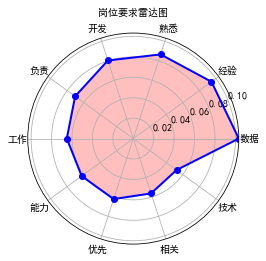

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pylab
pylab.rcParams['font.sans-serif'] = ['SimHei']
figure1 = plt.figure(2, figsize=(12, 6))
G = gridspec.GridSpec(3, 3)
ax1 = figure1.add_subplot(G[0:2, :], polar=True)
angles = np.linspace(0, 2 * np.pi, 10, endpoint=False)
data = np.concatenate((data, [data[0]])) 
angles = np.concatenate((angles, [angles[0]]))
ax1.plot(angles, data, 'bo-', linewidth=2) 
ax1.fill(angles, data, facecolor='r', alpha=0.25)  
ax1.set_thetagrids(angles * 180 / np.pi, labels, fontproperties="SimHei")
ax1.set_title(u"岗位要求雷达图", va='bottom', fontproperties="SimHei")
ax1.set_rlim(0, data.max())
ax1.grid(True)
plt.show()

### 制作工作岗位需求分析图

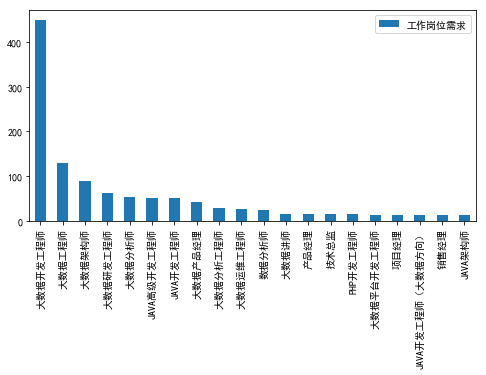

In [4]:
figure1 = plt.figure(2, figsize=(8, 6))
G = gridspec.GridSpec(3, 3)
ax1 = figure1.add_subplot(G[0:2, :])  
df_w.head(20).plot(kind='bar', ax=ax1, label=u'工作岗位需求')
ax1.legend()
plt.show()


### 制作城市岗位需求分析图

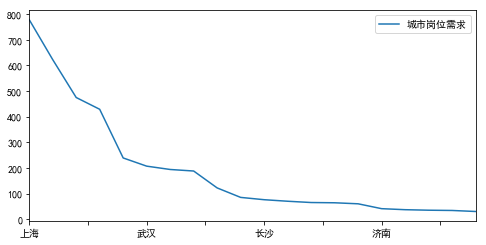

In [5]:
figure1 = plt.figure(2, figsize=(8, 6))
G = gridspec.GridSpec(3, 3)
ax1 = figure1.add_subplot(G[0:2, :])
df_a.head(20).plot(kind='line', ax=ax1, label=u'城市岗位需求')
ax1.legend()
plt.show()

### 制作岗位薪酬分析图

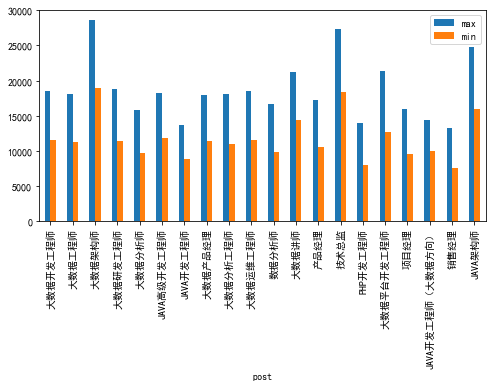

In [6]:
figure1 = plt.figure(2, figsize=(8, 6))
G = gridspec.GridSpec(3, 3)
ax1 = figure1.add_subplot(G[0:2, :])
df_pay.head(20).plot(kind='bar', ax=ax1, label=u'岗位薪酬')
ax1.legend()
plt.show()

### 制作城市薪酬分析图

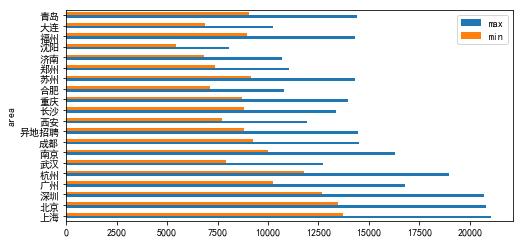

In [7]:
figure1 = plt.figure(2, figsize=(8, 6))
G = gridspec.GridSpec(3, 3)
ax1 = figure1.add_subplot(G[0:2, :])
df_areapay.head(20).plot(kind='barh', ax=ax1, label=u'城市薪酬')
ax1.legend()
plt.show()